In [2]:
!pip install mlxtend

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [5]:
df = pd.read_csv('/content/drive/MyDrive/DM_Lab/Market_Basket_Optimisation.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
transactions = df.values.tolist()
transactions_cleaned = [[item for item in row if pd.notna(item)] for row in transactions]
transactions_cleaned

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [8]:
from mlxtend.preprocessing import TransactionEncoder

In [9]:
te = TransactionEncoder()
te_ary = te.fit_transform(transactions_cleaned)
te_ary

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [10]:
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head(10)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3.0)

In [13]:
print("Frequent Itemsets:")
print(frequent_itemsets.sort_values(by="support", ascending=False))

Frequent Itemsets:
      support                                  itemsets
46   0.238368                           (mineral water)
19   0.179709                                    (eggs)
63   0.174110                               (spaghetti)
24   0.170911                            (french fries)
13   0.163845                               (chocolate)
..        ...                                       ...
97   0.010265                  (mineral water, cereals)
249  0.010132  (spaghetti, mineral water, french fries)
246  0.010132        (ground beef, mineral water, eggs)
175  0.010132       (frozen vegetables, low fat yogurt)
123  0.010132                         (soup, chocolate)

[257 rows x 2 columns]


In [14]:
frequent_itemsets.sample(10)

,support,itemsets
17,0.031862,(cottage cheese)
67,0.068391,(tomatoes)
74,0.027330,(yogurt cake)
209,0.047994,"(milk, mineral water)"
37,0.047460,(honey)
25,0.022530,(french wine)
130,0.011998,"(cookies, green tea)"
212,0.017598,"(shrimp, milk)"
102,0.011865,"(chicken, green tea)"
7,0.030129,(butter)


In [15]:
print("\nAssociation Rules:")
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,1.0,0.011138,1.33286,0.732460,0.121457,0.249734,0.243136
1,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,1.0,0.011138,1.13541,0.772094,0.121457,0.119261,0.243136


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

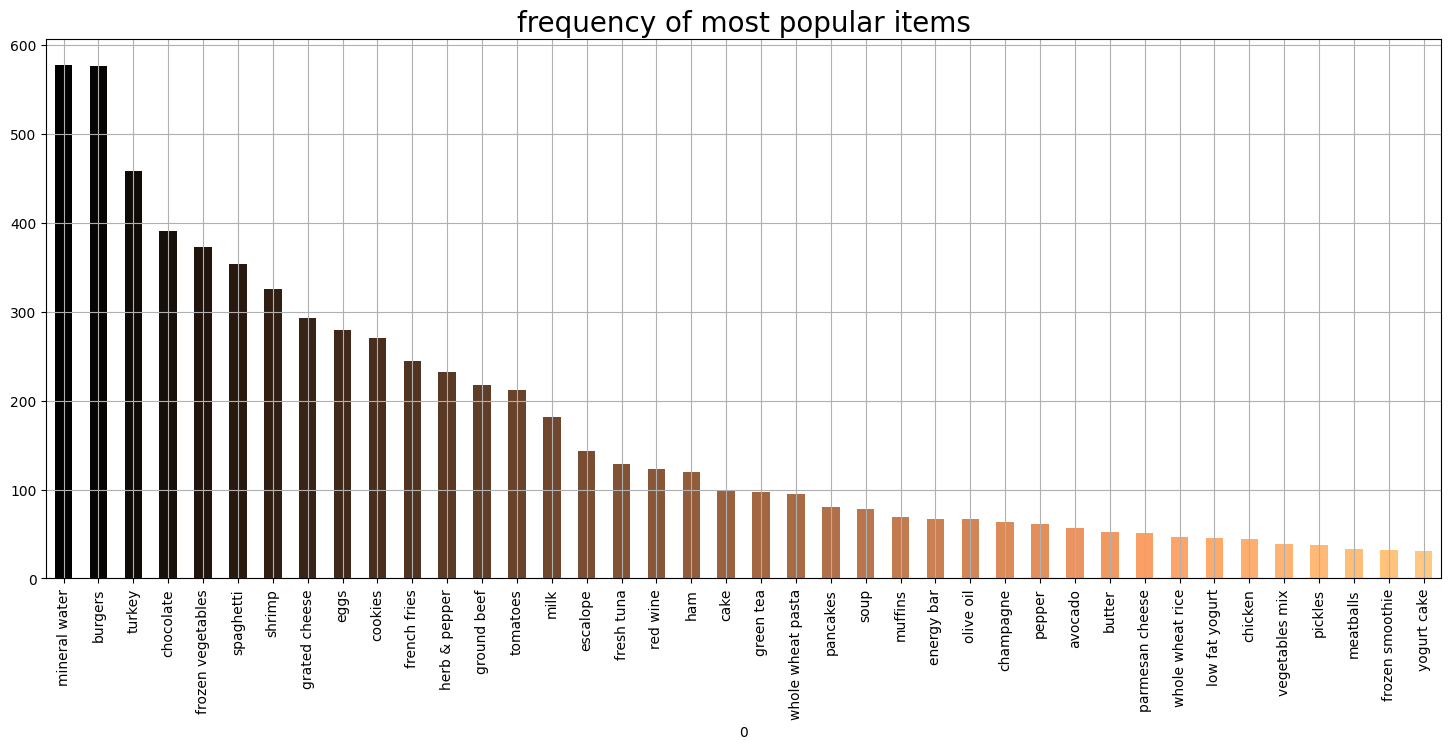

In [17]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

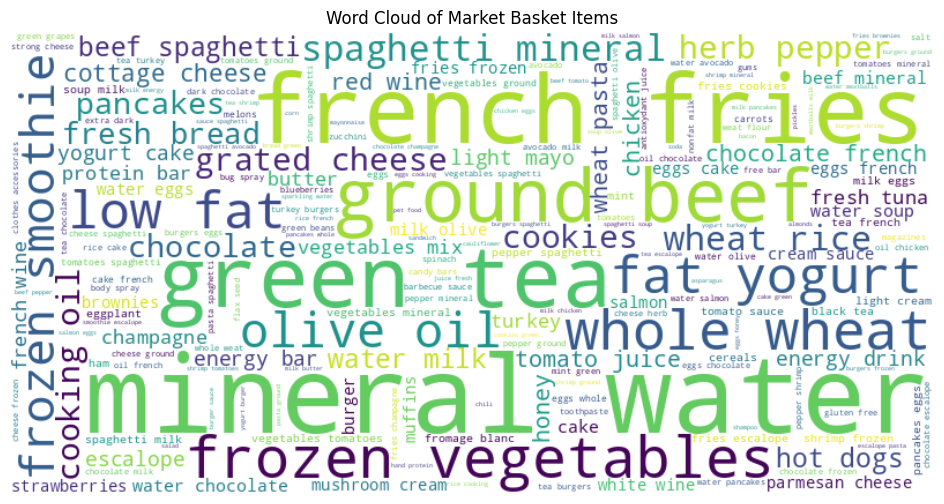

In [21]:
all_items = df.values.flatten()
all_items = [str(item) for item in all_items if pd.notna(item)]

items_string = " ".join(all_items)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(items_string)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Market Basket Items')
plt.show()